
# Project: Explore How Money Changes Americans' Lives in Recent Decades

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Read the first table:

In [3]:
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

Explore the table:

In [4]:
income.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


Check the basic data infos:

In [5]:
income.shape

(193, 220)

In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 220 entries, geo to 2018
dtypes: int64(219), object(1)
memory usage: 331.8+ KB


In [7]:
income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,16176.362694,16444.284974,16704.450777,16866.336788,17010.549223,17210.398964,17432.849741,17611.383420,17908.181347,18241.502591
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,18502.994709,18769.943218,19098.612186,18943.430768,18867.547829,18911.747174,19122.183694,19162.954535,19383.636509,19664.365483
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,588.000000,609.000000,614.000000,616.000000,598.000000,602.000000,623.000000,625.000000,627.000000,629.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,3120.000000,3280.000000,3370.000000,3430.000000,3300.000000,3270.000000,3290.000000,3390.000000,3520.000000,3670.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,9560.000000,9920.000000,10100.000000,10300.000000,10500.000000,10800.000000,11000.000000,11300.000000,11600.000000,12100.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,22100.000000,21800.000000,22700.000000,23000.000000,23200.000000,24000.000000,24100.000000,24300.000000,24900.000000,25500.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,117000.000000,125000.000000,129000.000000,125000.000000,123000.000000,121000.000000,120000.000000,118000.000000,120000.000000,121000.000000


Set the country name as the index:

In [8]:
income.set_index('geo', inplace=True)

Test:

In [9]:
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
Albania,667,667,667,667,667,668,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
Algeria,715,716,717,718,719,720,721,722,723,724,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
Angola,618,620,623,626,628,631,634,637,640,642,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [10]:
income.loc['United States']

1800     2130
1801     2170
1802     2200
1803     2170
1804     2170
1805     2210
1806     2250
1807     2270
1808     2110
1809     2220
1810     2280
1811     2330
1812     2290
1813     2310
1814     2360
1815     2350
1816     2250
1817     2250
1818     2260
1819     2250
1820     2240
1821     2280
1822     2340
1823     2310
1824     2380
1825     2430
1826     2450
1827     2460
1828     2460
1829     2380
        ...  
1989    36800
1990    37100
1991    36500
1992    37300
1993    37800
1994    38900
1995    39500
1996    40500
1997    41800
1998    43200
1999    44700
2000    46000
2001    46000
2002    46400
2003    47300
2004    48600
2005    49800
2006    50600
2007    51000
2008    50400
2009    48600
2010    49400
2011    49800
2012    50500
2013    51000
2014    51800
2015    52800
2016    53300
2017    54200
2018    54900
Name: United States, Length: 219, dtype: int64

Check if any data is missing in the 'United States' row

In [11]:
income.loc['United States'].isnull().sum()

0

Onto the second table:

In [12]:
life_expectancy = pd.read_csv('life_expectancy_years.csv')

In [13]:
life_expectancy.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [14]:
life_expectancy.shape

(187, 220)

In [15]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 220 entries, geo to 2018
dtypes: float64(219), object(1)
memory usage: 321.5+ KB


In [16]:
life_expectancy.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,184.000000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,70.001070,70.225668,70.659358,71.05615,71.399465,71.622995,71.933690,72.206952,72.422283,72.658152
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,8.832102,9.050710,8.439841,8.18101,7.996165,7.889169,7.605557,7.414169,7.331040,7.252807
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,45.400000,32.100000,47.500000,47.90000,48.000000,48.400000,49.600000,50.300000,50.800000,51.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,63.400000,63.900000,64.300000,65.00000,65.350000,65.550000,66.050000,66.650000,66.900000,67.100000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,72.500000,72.600000,72.700000,72.80000,72.900000,73.000000,73.300000,73.500000,73.700000,74.050000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,76.600000,76.700000,76.900000,77.00000,77.200000,77.350000,77.500000,77.650000,77.825000,78.025000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,82.700000,82.800000,82.900000,83.20000,83.400000,83.600000,83.800000,83.900000,84.000000,84.200000


Set 'geo' as the index:

In [17]:
life_expectancy.set_index('geo', inplace=True)
life_expectancy.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


Check if any data is missing in the 'United States' row

In [18]:
life_expectancy.loc['United States'].isnull().sum()

0

Read the third table:

In [19]:
suicide = pd.read_csv('suicide_per_100000_people.csv')
suicide.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,9.21,9.34,9.47,9.58,9.78,9.89,9.98,10.10,10.10,...,10.40,10.30,10.30,10.20,10.10,10.10,10.20,10.20,10.10,10.10
1,Albania,4.24,4.36,4.43,4.61,4.72,4.96,5.23,5.61,5.85,...,6.67,6.72,6.59,6.38,6.21,6.06,5.96,5.84,5.75,5.67
2,Algeria,4.13,4.07,4.04,4.02,3.99,3.96,3.95,3.98,3.99,...,3.83,3.79,3.76,3.72,3.71,3.71,3.73,3.74,3.72,3.70
3,Andorra,9.74,9.69,9.70,9.46,9.28,9.06,8.83,9.03,8.86,...,8.29,8.25,8.27,8.30,8.37,8.42,8.44,8.19,8.24,8.28
4,Angola,12.00,11.90,11.80,12.00,12.20,12.20,11.80,11.60,12.20,...,11.80,11.70,11.50,11.40,11.30,11.10,11.00,10.90,10.80,10.60


Explore the basic infos:

In [20]:
suicide.shape

(187, 28)

In [21]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
geo     187 non-null object
1990    187 non-null float64
1991    187 non-null float64
1992    187 non-null float64
1993    187 non-null float64
1994    187 non-null float64
1995    187 non-null float64
1996    187 non-null float64
1997    187 non-null float64
1998    187 non-null float64
1999    187 non-null float64
2000    187 non-null float64
2001    187 non-null float64
2002    187 non-null float64
2003    187 non-null float64
2004    187 non-null float64
2005    187 non-null float64
2006    187 non-null float64
2007    187 non-null float64
2008    187 non-null float64
2009    187 non-null float64
2010    187 non-null float64
2011    187 non-null float64
2012    187 non-null float64
2013    187 non-null float64
2014    187 non-null float64
2015    187 non-null float64
2016    187 non-null float64
dtypes: float64(27), object(1)
memory usage: 41.0+ KB


In [22]:
suicide.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,12.335401,12.420481,12.521444,12.708235,12.892567,12.951658,12.836203,12.794813,12.791283,12.718984,...,11.769412,11.615294,11.436310,11.291925,11.143797,11.026952,10.904225,10.809465,10.765027,10.726738
std,7.301243,7.393414,7.528930,7.972768,8.369029,8.355932,8.081377,7.970099,7.992331,7.980666,...,7.361545,7.208098,6.950493,6.855475,6.701576,6.548204,6.449399,6.315291,6.274893,6.206495
min,1.710000,1.720000,1.760000,1.800000,1.860000,1.920000,2.010000,2.100000,2.190000,2.280000,...,2.360000,2.380000,2.380000,2.420000,2.430000,2.310000,2.270000,2.300000,2.270000,2.250000
25%,6.365000,6.400000,6.480000,6.650000,6.810000,6.835000,6.935000,6.840000,6.925000,6.825000,...,6.620000,6.620000,6.555000,6.420000,6.395000,6.450000,6.520000,6.545000,6.540000,6.550000
50%,11.300000,11.500000,11.700000,11.600000,11.600000,11.900000,11.800000,11.700000,11.500000,11.500000,...,10.400000,10.200000,10.100000,10.100000,9.880000,9.760000,9.720000,9.690000,9.710000,9.690000
75%,16.250000,16.100000,16.450000,16.550000,16.250000,16.350000,16.550000,16.650000,16.600000,16.400000,...,14.550000,14.200000,13.850000,13.850000,13.650000,13.400000,13.350000,13.250000,13.150000,12.950000
max,41.100000,40.800000,41.000000,43.000000,48.200000,47.200000,44.600000,46.100000,45.800000,44.300000,...,41.400000,39.400000,38.100000,39.000000,38.800000,39.200000,39.800000,39.700000,39.400000,39.000000


Set 'geo' as the new index:

In [23]:
suicide.set_index('geo', inplace=True)
suicide.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.21,9.34,9.47,9.58,9.78,9.89,9.98,10.10,10.10,10.20,...,10.40,10.30,10.30,10.20,10.10,10.10,10.20,10.20,10.10,10.10
Albania,4.24,4.36,4.43,4.61,4.72,4.96,5.23,5.61,5.85,5.97,...,6.67,6.72,6.59,6.38,6.21,6.06,5.96,5.84,5.75,5.67
Algeria,4.13,4.07,4.04,4.02,3.99,3.96,3.95,3.98,3.99,4.02,...,3.83,3.79,3.76,3.72,3.71,3.71,3.73,3.74,3.72,3.70
Andorra,9.74,9.69,9.70,9.46,9.28,9.06,8.83,9.03,8.86,8.73,...,8.29,8.25,8.27,8.30,8.37,8.42,8.44,8.19,8.24,8.28
Angola,12.00,11.90,11.80,12.00,12.20,12.20,11.80,11.60,12.20,11.90,...,11.80,11.70,11.50,11.40,11.30,11.10,11.00,10.90,10.80,10.60


Check if any data is missing in the 'United States' row

In [24]:
suicide.loc['United States'].isnull().sum()

0

Read the last table:

In [25]:
parl_seat = pd.read_csv('sg_gen_parl_zs.csv')
parl_seat.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,27.3,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7
1,Albania,28.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,16.4,16.4,15.7,15.7,17.9,20.0,20.7,22.9,27.9
2,Algeria,2.4,NaN,NaN,NaN,NaN,NaN,NaN,3.2,3.2,...,7.7,7.7,7.7,8.0,31.6,31.6,31.6,31.6,31.6,25.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,7.1,...,25.0,35.7,35.7,50.0,50.0,50.0,50.0,39.3,32.1,32.1
4,Angola,14.5,NaN,NaN,NaN,NaN,NaN,NaN,9.5,15.5,...,37.3,38.6,38.6,38.2,34.1,34.1,36.8,36.8,36.8,38.2


In [26]:
parl_seat.shape

(192, 29)

In [27]:
parl_seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 29 columns):
country    192 non-null object
1990       137 non-null float64
1991       0 non-null float64
1992       0 non-null float64
1993       0 non-null float64
1994       0 non-null float64
1995       0 non-null float64
1996       0 non-null float64
1997       159 non-null float64
1998       161 non-null float64
1999       152 non-null float64
2000       156 non-null float64
2001       166 non-null float64
2002       159 non-null float64
2003       173 non-null float64
2004       180 non-null float64
2005       184 non-null float64
2006       188 non-null float64
2007       187 non-null float64
2008       186 non-null float64
2009       186 non-null float64
2010       186 non-null float64
2011       187 non-null float64
2012       188 non-null float64
2013       186 non-null float64
2014       187 non-null float64
2015       188 non-null float64
2016       191 non-null float64
2017       1

In [28]:
parl_seat.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,159.000000,161.000000,152.000000,...,186.000000,186.000000,186.000000,187.000000,188.000000,186.000000,187.000000,188.000000,191.000000,192.000000
mean,9.867153,NaN,NaN,NaN,NaN,NaN,NaN,10.392453,10.938509,11.334211,...,16.748387,17.380108,17.411290,18.194118,18.993085,19.801075,20.205348,20.664362,20.831414,21.420312
std,8.661605,NaN,NaN,NaN,NaN,NaN,NaN,8.144677,8.549533,8.675688,...,10.722708,11.189879,11.052055,11.457388,11.516438,11.673018,11.978416,12.101984,12.050890,11.760082
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,4.700000,4.800000,5.150000,...,8.925000,8.950000,9.650000,10.000000,10.650000,11.575000,11.900000,12.325000,12.200000,12.375000
50%,7.100000,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,9.000000,9.400000,...,15.000000,16.000000,15.450000,16.800000,17.350000,18.450000,18.900000,19.300000,19.900000,20.100000
75%,13.300000,NaN,NaN,NaN,NaN,NaN,NaN,13.150000,15.000000,15.550000,...,23.275000,23.500000,23.475000,24.400000,25.050000,26.575000,27.000000,28.575000,29.600000,29.525000
max,38.400000,NaN,NaN,NaN,NaN,NaN,NaN,40.400000,40.400000,42.700000,...,56.300000,56.300000,56.300000,56.300000,56.300000,63.800000,63.800000,63.800000,63.800000,61.300000


Set 'country' as the new index:

In [29]:
parl_seat.set_index('country', inplace=True)
parl_seat.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.7,27.3,27.7,27.7,27.7,27.7,27.7,27.7,27.7,27.7
Albania,28.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,...,7.1,16.4,16.4,15.7,15.7,17.9,20.0,20.7,22.9,27.9
Algeria,2.4,NaN,NaN,NaN,NaN,NaN,NaN,3.2,3.2,3.2,...,7.7,7.7,7.7,8.0,31.6,31.6,31.6,31.6,31.6,25.8
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,7.1,7.1,...,25.0,35.7,35.7,50.0,50.0,50.0,50.0,39.3,32.1,32.1
Angola,14.5,NaN,NaN,NaN,NaN,NaN,NaN,9.5,15.5,15.5,...,37.3,38.6,38.6,38.2,34.1,34.1,36.8,36.8,36.8,38.2


Check if any data is missing in the 'United States' row

In [30]:
parl_seat.loc['United States'].isnull().sum()

7

### Data Cleaning 

As shown in the section above, there are some missing data in the last table, so the data are being cleaned in this section. 

In [31]:
parl_seat.loc['United States']

1990     6.6
1991     NaN
1992     NaN
1993     NaN
1994     NaN
1995     NaN
1996     NaN
1997    11.7
1998    11.7
1999    13.3
2000     NaN
2001    14.0
2002    13.8
2003    14.3
2004    14.9
2005    15.2
2006    16.3
2007    16.8
2008    17.0
2009    16.8
2010    16.8
2011    16.8
2012    18.0
2013    17.9
2014    19.3
2015    19.4
2016    19.4
2017    19.4
Name: United States, dtype: float64

Make a simple plot to see the general trend:

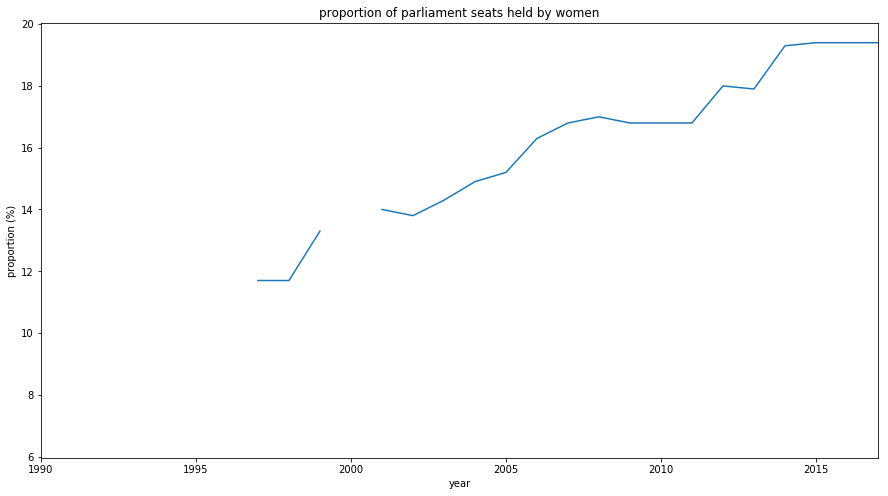

In [34]:
ax = parl_seat.loc['United States'].plot(figsize=(15, 8), title='proportion of parliament seats held by women')
ax.set(xlabel='year', ylabel='proportion (%)');

As can be seen in the figure above, overall the line exhibits a linear increasing trend, therefore I decide to use linear interpolation to fill in the missing data.

In [35]:
parl_seat.interpolate(method='linear', axis=1, inplace=True)

Check again

In [36]:
parl_seat.loc['United States']

1990     6.600000
1991     7.328571
1992     8.057143
1993     8.785714
1994     9.514286
1995    10.242857
1996    10.971429
1997    11.700000
1998    11.700000
1999    13.300000
2000    13.650000
2001    14.000000
2002    13.800000
2003    14.300000
2004    14.900000
2005    15.200000
2006    16.300000
2007    16.800000
2008    17.000000
2009    16.800000
2010    16.800000
2011    16.800000
2012    18.000000
2013    17.900000
2014    19.300000
2015    19.400000
2016    19.400000
2017    19.400000
Name: United States, dtype: float64

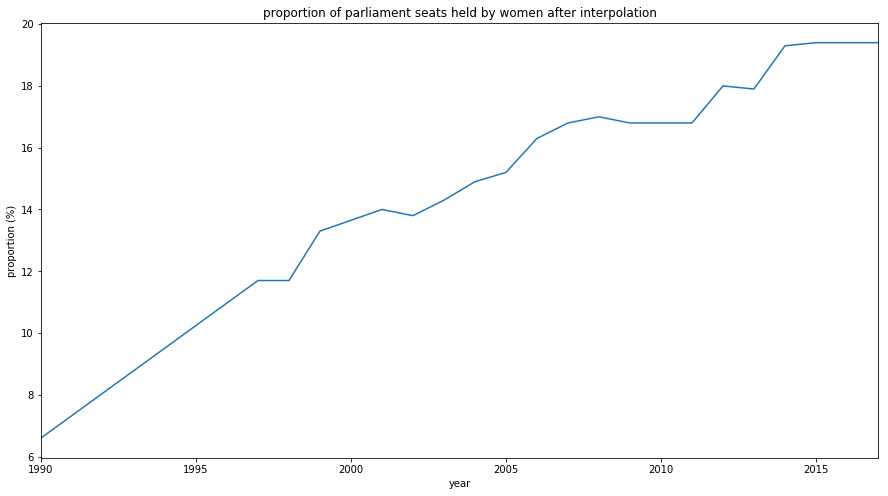

In [37]:
ax = parl_seat.loc['United States'].plot(figsize=(15, 8), title='proportion of parliament seats held by women after interpolation')
ax.set(xlabel='year', ylabel='proportion (%)');

<a id='eda'></a>
## Exploratory Data Analysis

In order to compare all the variables together, combine the 'United States' rows from four tables into one dataframe.

In [38]:
US_income = income.loc['United States']
US_life_exp = life_expectancy.loc['United States']
US_suicide = suicide.loc['United States']
US_parl_seat = parl_seat.loc['United States']

Since the years are different in some tables, we decide to join only on the common time frame.

In [39]:
US_data = pd.concat([US_income, US_life_exp, US_suicide, US_parl_seat], axis=1, join='inner')

In [40]:
US_data.columns = ['income', 'life_expectancy', 'suicide', 'parl_seat_gender_ratio']

In [41]:
US_data

,income,life_expectancy,suicide,parl_seat_gender_ratio
1990,37100,75.4,12.9,6.600000
1991,36500,75.5,12.8,7.328571
1992,37300,75.7,12.7,8.057143
1993,37800,75.7,12.7,8.785714
1994,38900,75.8,12.6,9.514286
1995,39500,75.9,12.5,10.242857
1996,40500,76.2,12.2,10.971429
1997,41800,76.6,12.0,11.700000
1998,43200,76.7,11.8,11.700000
1999,44700,76.8,11.7,13.300000


### Does money make Americans live longer?

For this question we explore the relationship between the income and life expectancy variables.

First look at the overall trend for income:

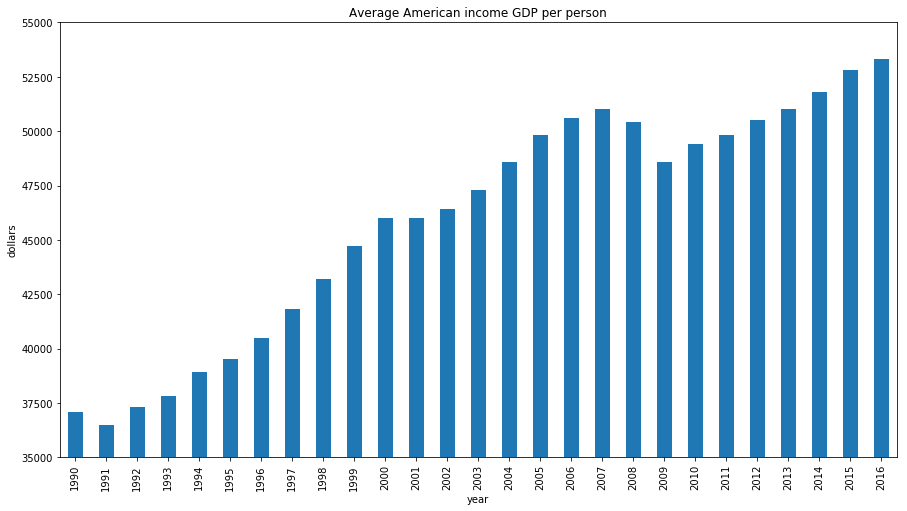

In [53]:
ax = US_data.income.plot(kind='bar', ylim=[35000, 55000], figsize=(15, 8), title='Average American income GDP per person')
ax.set(xlabel='year', ylabel='dollars');

The overall income increases over the years, except around the year 2009 there is some minor decrease, but after that it has the trend to continue to increase.

Now we look at the overall change of people's life expectancy.

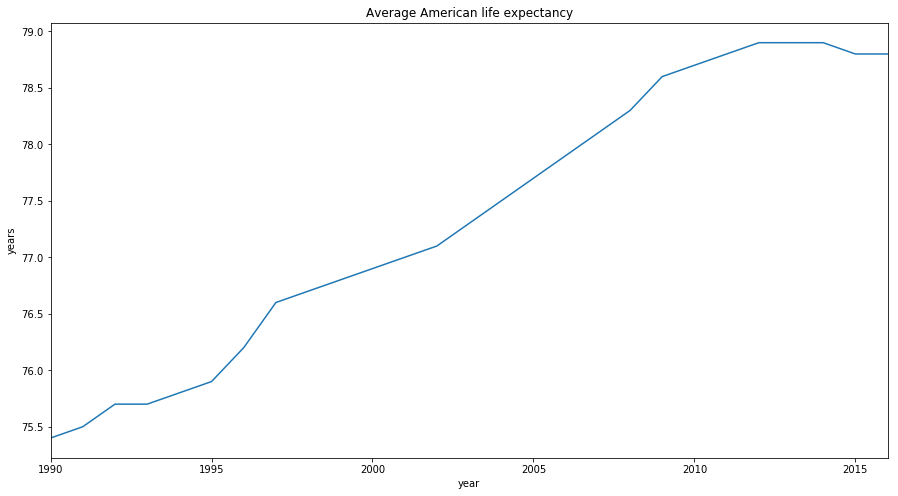

In [43]:
ax = US_data.life_expectancy.plot(figsize=(15, 8), title='Average American life expectancy')
ax.set(xlabel='year', ylabel='years');

From this figure we can see that the life expectancy has been increasing over the years as well. To see any possible correlation between the two variables, we put them into one plot.

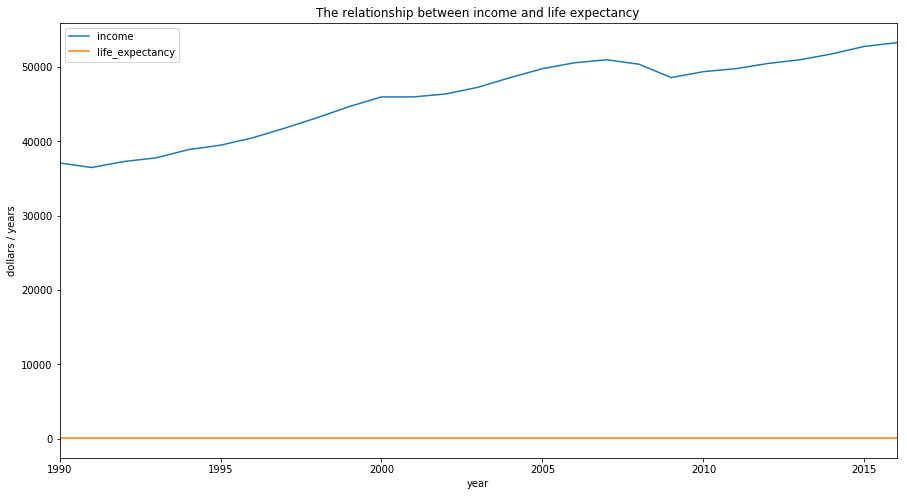

In [44]:
ax = US_data.iloc[:,:2].plot(figsize=(15, 8), title='The relationship between income and life expectancy')
ax.set(xlabel='year', ylabel='dollars / years');

However, since the two variables are in totally different scale, it is hard to see any relationship on the same y-axis. The life expectancy looks like a straight horizontal line in this graph. Thus, we use a double y-axis to better display the two lines.

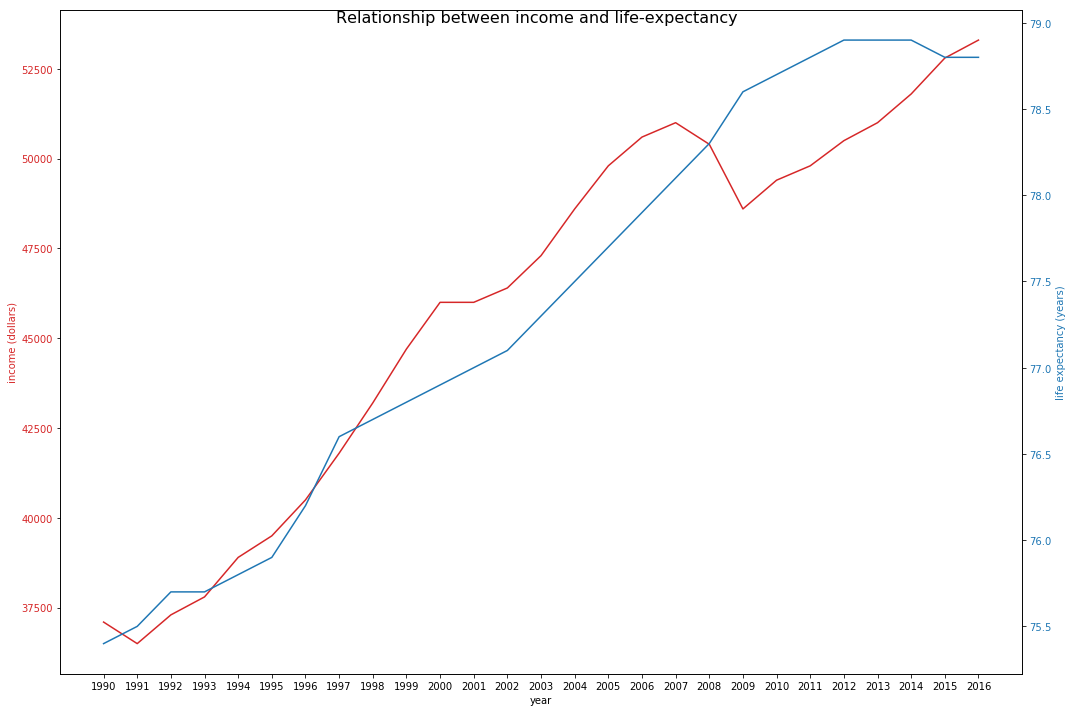

In [53]:
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('year')
ax1.set_ylabel('income (dollars)', color=color)
ax1.plot(US_data.iloc[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('life expectancy (years)', color=color)
ax2.plot(US_data.iloc[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
fig.suptitle('Relationship between income and life-expectancy', fontsize=16);

From the plot above, we see some very similar rising behavior on the income line and life-expectancy line, it is likely that there is some correlation between the two variables.

### Does money make Americans mentally healthier?

Here we use the suicide data to explore people's mental health. To see if higher income affects people's mental health in some way, the relationship between the income variable and suicide variable is examined.

First we look at the overall trend of the suicide numbers:

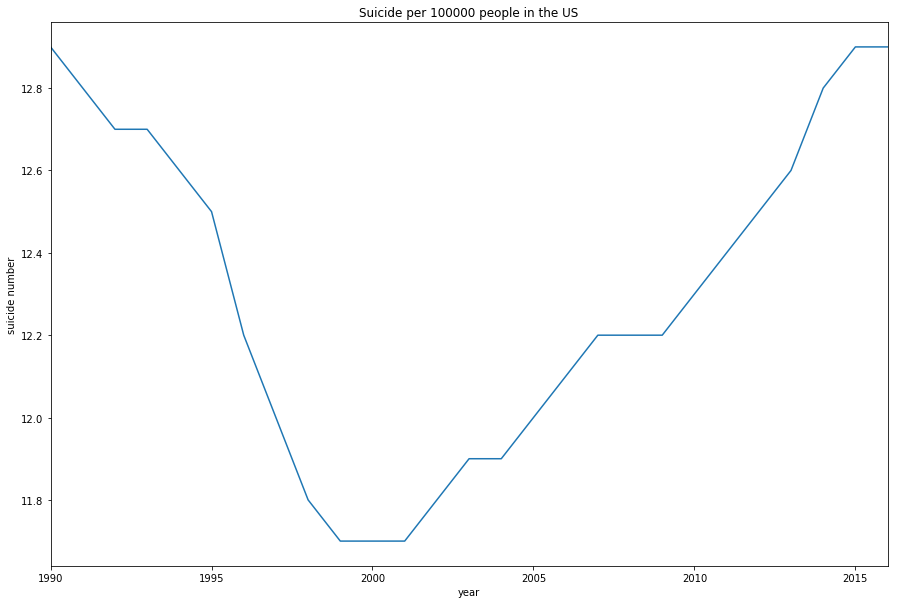

In [50]:
ax = US_data.suicide.plot(figsize=(15, 10), title='Suicide per 100000 people in the US')
ax.set(xlabel='year', ylabel='suicide number');

And combine it with the income variable:

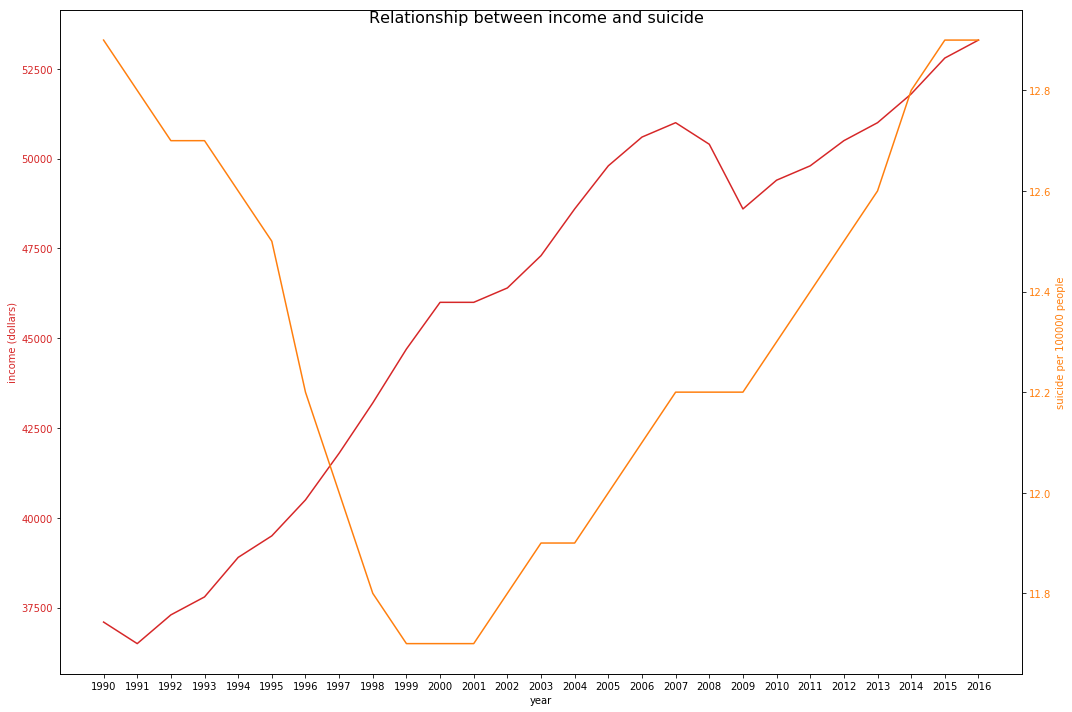

In [55]:
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('year')
ax1.set_ylabel('income (dollars)', color=color)
ax1.plot(US_data.iloc[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('suicide per 100000 people', color=color)
ax2.plot(US_data.iloc[:,2], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
fig.suptitle('Relationship between income and suicide', fontsize=16);

The relationship seems a bit odd. Early around the year 1990, suicide number is rather high, as people's income increases, it starts to drop drastically. However, as the income continues to increase, the suicide number begins to rise again around the year 2001. 

### Does money improve gender equality in the US?

We use the proportion of parliament seats held by women data to indicate the gender equality and see how it varies as people's income rises over the years.

First we make a simple plot to see the general trend of the female parliament seats number.

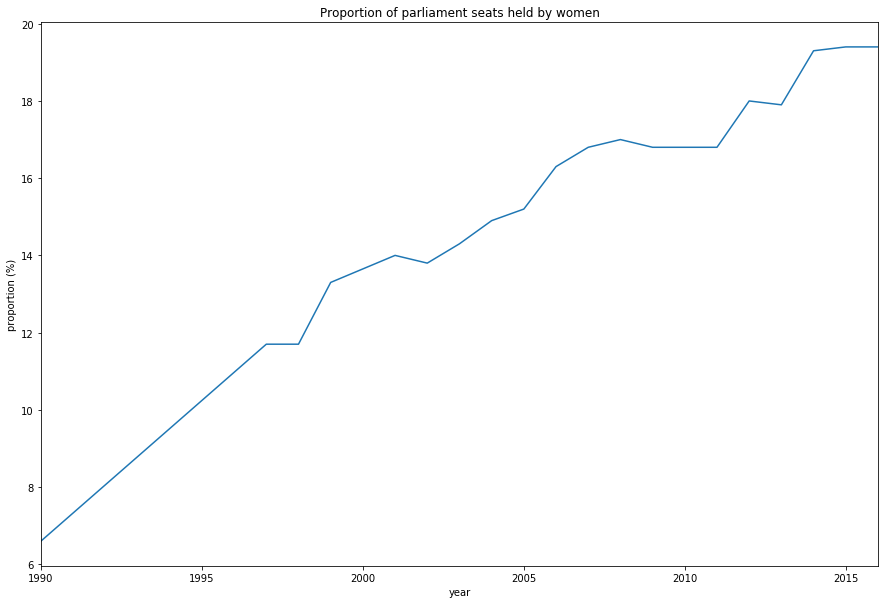

In [46]:
ax = US_data.parl_seat_gender_ratio.plot(figsize=(15, 10), title='Proportion of parliament seats held by women')
ax.set(xlabel='year', ylabel='proportion (%)');

Now let's see how it changes with regard to the income data.

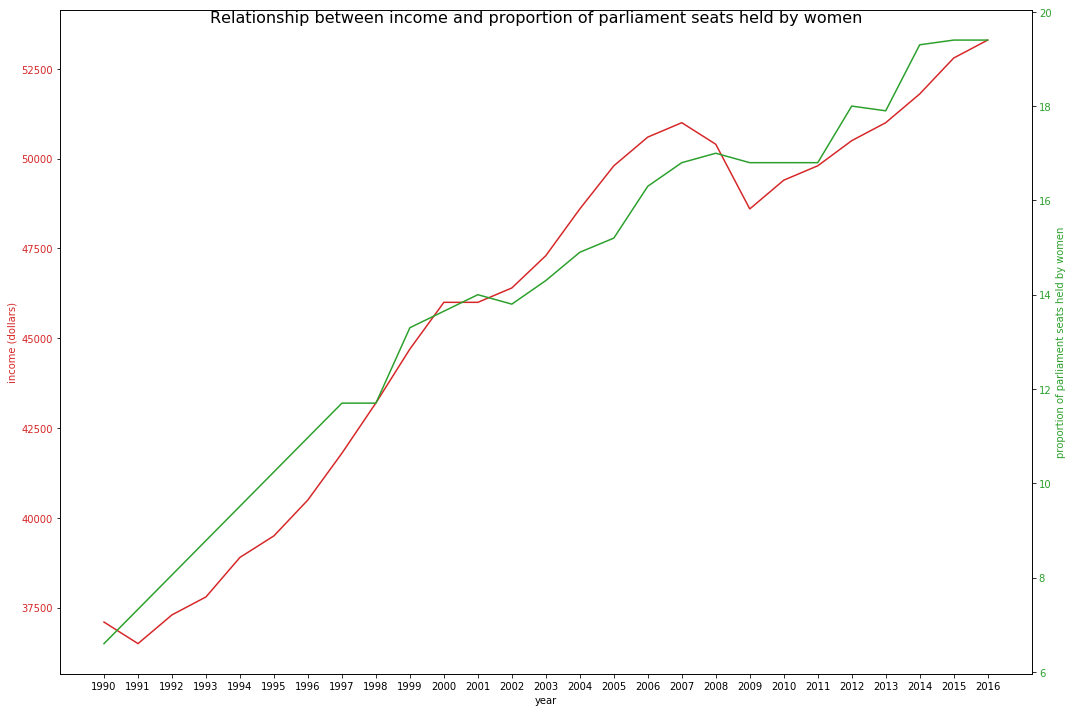

In [57]:
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('year')
ax1.set_ylabel('income (dollars)', color=color)
ax1.plot(US_data.iloc[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('proportion of parliament seats held by women', color=color)
ax2.plot(US_data.iloc[:,3], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
fig.suptitle('Relationship between income and proportion of parliament seats held by women', fontsize=16);

In this figure, we see an amazingly similar changing pattern between income and the proportion of parliament seats held by women. Even during the years when the income drops around the year 2009, the proportion also sees a slight decrease. 

<a id='conclusions'></a>
## Conclusions

Lastly we put all the variables together to see a bigger picture:

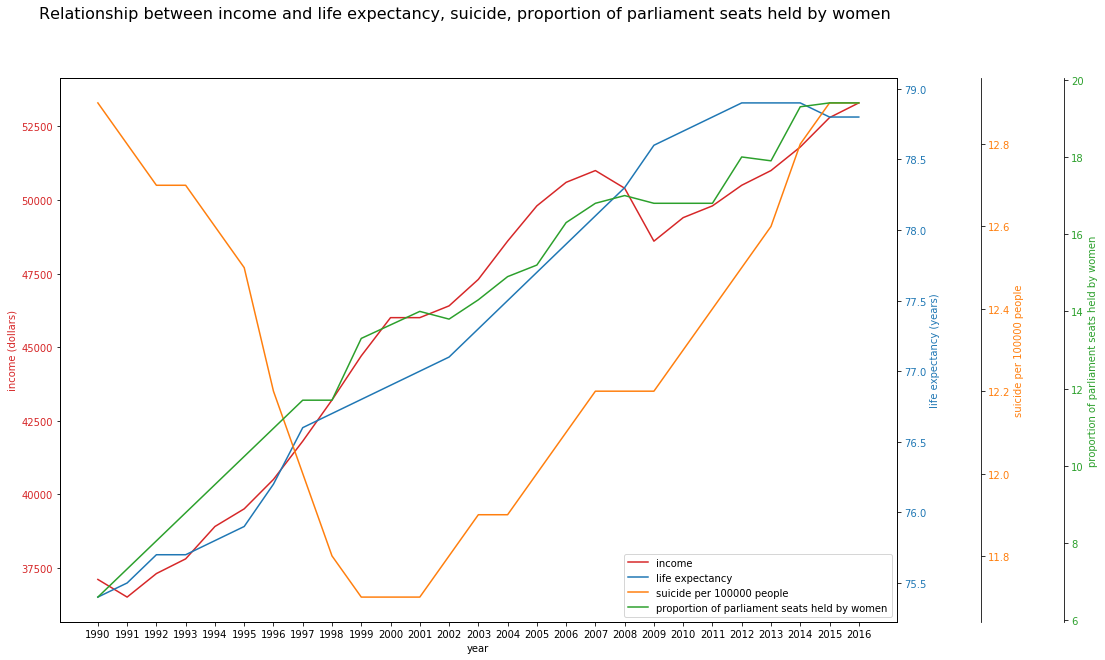

In [48]:
def settings(x, color):
    x.tick_params(axis='y', labelcolor=color)
    
colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('year')
ax1.set_ylabel('income (dollars)', color=colors[0])
p1, = ax1.plot(US_data.iloc[:,0], color=colors[0], label='income')
settings(ax1, colors[0])

ax2 = ax1.twinx()
ax2.set_ylabel('life expectancy (years)', color=colors[1])
p2, = ax2.plot(US_data.iloc[:,1], color=colors[1], label='life expectancy')
settings(ax2, colors[1])

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
ax3.spines['right'].set_visible(True)
ax3.set_ylabel('suicide per 100000 people', color=colors[2])
p3, = ax3.plot(US_data.iloc[:,2], color=colors[2], label='suicide per 100000 people')
settings(ax3, colors[2])

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('axes', 1.2))
ax4.spines['right'].set_visible(True)
ax4.set_ylabel('proportion of parliament seats held by women', color=colors[3])
p4, = ax4.plot(US_data.iloc[:,3], color=colors[3], label='proportion of parliament seats held by women')
settings(ax4, colors[3])
lines = [p1, p2, p3, p4]
ax1.legend(lines, [l.get_label() for l in lines], loc='lower right')
fig.suptitle('Relationship between income and life expectancy, suicide, proportion of parliament seats held by women', fontsize=16);

- Conclusion: In this last figure, we definitely can see some correlations between income and life expectancy, proportion of female parliament seat helders. As the income rises throughout the years, life expectancy and the proportion of female parliament seat helders also increased accordingly. Even though there might be many other factors that could play a role here, we can argue that income could be one of the elements. As for the suicide number, it is not very clear how income influences its changing pattern. We can easily understand that as people get richer, they are probably happier and mentally healthier, which could be one of the leading factors that the suicide drops from the year 1990 to 1999, and yet we are not sure if it is also one of the reasons that suicide rises again from the year 2001 to today. In conclusion, we argue that as Americans become more affluent, it is likely that they live longer, and that the overall gender equality is improved in the society. However, they could still be mentally unhealthy like when they were poor.


- Limitations: The conclusions we made are based on very limited data, the data could also be erroneous. The GDP per person data are claimed to be adjusted according to inflation, and yet we do not know how the calculation was done and thus there is no way we can be certain that the data are not biased or skewed. In the dataset we used, the missing data could also largely affect our results since our linear interpolation may not reflect the reality. In order to make the results more accurate, we have to collect more data on other factors that could also influence our findings, and we need to make sure that the data we used are accurate without manual errors. 